**Business Understanding**

Thailand Happiness

find cluster

**Data Understanding**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
df1=pd.read_excel('rankhappy.xls')

**Data Preparation**

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [4]:
df1.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735400,7.984372,0.768425,54.400002,0.732971,-0.094634,0.723612,0.737636,0.208555
1945,Zimbabwe,2017,3.638300,8.015738,0.754147,55.000000,0.752826,-0.097645,0.751208,0.806428,0.224051
1946,Zimbabwe,2018,3.616480,8.048798,0.775388,55.599998,0.762675,-0.068427,0.844209,0.710119,0.211726
1947,Zimbabwe,2019,2.693523,7.950132,0.759162,56.200001,0.631908,-0.063791,0.830652,0.716004,0.235354
1948,Zimbabwe,2020,3.159802,7.828757,0.717243,56.799999,0.643303,-0.008696,0.788523,0.702573,0.345736


In [5]:
df1.sample(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
507,Egypt,2015,4.762538,9.265818,0.729744,60.799999,0.659261,-0.088560,0.684498,0.609594,0.344332
914,Kosovo,2016,5.759412,9.228177,0.823803,NaN,0.827399,0.124869,0.940898,0.703887,0.149607
584,Gabon,2016,4.831764,9.639439,0.780049,58.700001,0.698942,-0.204033,0.816564,0.640117,0.432405
1690,Tajikistan,2014,4.896158,7.910819,0.809826,63.040001,0.852732,0.001544,0.698431,0.656047,0.196154
1193,Namibia,2017,4.441306,9.215378,0.828339,56.200001,0.810402,-0.190043,0.831303,0.720678,0.277252
192,Bolivia,2020,5.559259,8.997990,0.804811,64.199997,0.877032,-0.053764,0.868208,0.789818,0.381791
644,Greece,2015,5.622519,10.258951,0.834825,71.800003,0.531736,-0.271978,0.823960,0.739751,0.277413
1872,Uzbekistan,2013,5.939986,8.607008,0.962781,63.799999,0.949540,-0.034047,0.433932,0.749193,0.130197
1156,Montenegro,2013,5.074342,9.760366,0.735565,67.580002,0.502265,-0.175839,0.693372,0.538980,0.331082
222,Brazil,2010,6.837331,9.606989,0.905528,64.500000,0.805949,-0.053969,0.656036,0.816655,0.249881


In [6]:
df1.Date=pd.to_datetime(df1.year,format="%Y")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14076\3473606719.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.Date=pd.to_datetime(df1.year,format="%Y")


In [7]:
df1.set_index('year',inplace=True)

In [8]:
df1=df1[df1['Country name'] == 'Thailand']

In [9]:
df1

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,,
2006,Thailand,5.885433,9.461148,0.894327,64.139999,0.863195,0.331460,0.934745,0.813509,0.164123
2007,Thailand,5.783891,9.508475,0.888634,64.480003,0.870159,0.390946,0.897753,0.831810,0.180010
2008,Thailand,5.636471,9.520327,0.831711,64.820000,0.867834,0.425482,0.933373,0.819038,0.145059
2009,Thailand,5.475645,9.508361,0.893245,65.160004,0.868224,0.524908,0.903822,0.897641,0.166086
2010,Thailand,6.216703,9.575911,0.897651,65.500000,0.859636,0.535985,0.916693,0.901268,0.181523
2011,Thailand,6.663609,9.579475,0.884351,65.720001,0.926882,0.400159,0.923196,0.934374,0.116676
2012,Thailand,6.300235,9.644709,0.906098,65.940002,0.846933,0.379859,0.908612,0.854544,0.137503
2013,Thailand,6.231025,9.666691,0.926378,66.160004,0.781082,0.456227,0.925430,0.845981,0.140831
2014,Thailand,6.985464,9.672178,0.933167,66.379997,0.899846,0.552521,0.919834,0.811370,0.168738


In [10]:
df1.columns

Index(['Country name', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [11]:
df1=df1.rename(columns={'Country name':'Country_name',
                        'Life Ladder':'Life_Ladder',
                        'Log GDP per capita':'Log_GDP_per_capita',
                        'Social support':'Social_support',
       'Healthy life expectancy at birth':'Healthy_life_expectancy_at_birth', 
                        'Freedom to make life choices':'Freedom_to_make_life_choices',
       'Generosity':'Generosity',
                        'Perceptions of corruption':'Perceptions_of_corruption',
                        'Positive_affect':'Positive_affect',
       'Negative affect':'Negative_affect'
                       })

In [12]:
df1.columns

Index(['Country_name', 'Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption', 'Positive affect',
       'Negative_affect'],
      dtype='object')

In [13]:
df1.isnull().sum()

Country_name                        0
Life_Ladder                         0
Log_GDP_per_capita                  0
Social_support                      0
Healthy_life_expectancy_at_birth    0
Freedom_to_make_life_choices        0
Generosity                          0
Perceptions_of_corruption           0
Positive affect                     0
Negative_affect                     0
dtype: int64

select data

**Modeling**

In [14]:
colss=['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption', 'Positive affect',
       'Negative_affect']

array([[<AxesSubplot:title={'center':'Life_Ladder'}>,
        <AxesSubplot:title={'center':'Log_GDP_per_capita'}>,
        <AxesSubplot:title={'center':'Social_support'}>,
        <AxesSubplot:title={'center':'Healthy_life_expectancy_at_birth'}>,
        <AxesSubplot:title={'center':'Freedom_to_make_life_choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions_of_corruption'}>,
        <AxesSubplot:title={'center':'Positive affect'}>,
        <AxesSubplot:title={'center':'Negative_affect'}>]], dtype=object)

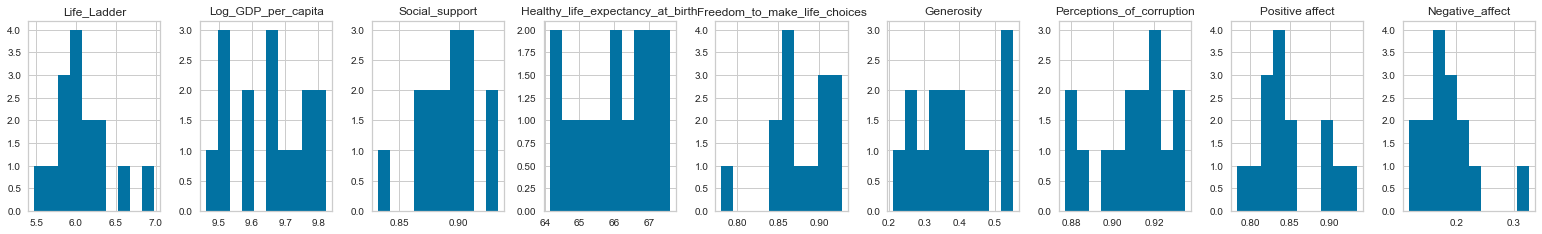

In [15]:
df1[colss].hist(layout=(1,len(colss)),figsize=(3*len(colss),3.5))

In [16]:
scaler=preprocessing.PowerTransformer(standardize=True)
S1=scaler.fit_transform(df1[colss])
S1[:7].round(4)

array([[-0.4889, -1.6087,  0.1168, -1.6883, -0.5233, -0.4544,  1.6665,
        -0.8834, -0.2844],
       [-0.8354, -1.2212, -0.1209, -1.4397, -0.3406,  0.1595, -0.7584,
        -0.3197,  0.1391],
       [-1.3873, -1.1228, -2.1343, -1.1767, -0.4027,  0.4946,  1.5494,
        -0.7048, -0.8876],
       [-2.0641, -1.2221,  0.0711, -0.8987, -0.3924,  1.3824, -0.4503,
         1.1771, -0.2285],
       [ 0.4802, -0.6545,  0.259 , -0.6048, -0.613 ,  1.4748,  0.3089,
         1.2404,  0.1761],
       [ 1.4803, -0.624 , -0.295 , -0.4058,  1.5715,  0.2503,  0.7546,
         1.7483, -2.0269],
       [ 0.6909, -0.0583,  0.6319, -0.1996, -0.9135,  0.0487, -0.1855,
         0.281 , -1.1599]])

In [17]:
X2=pd.DataFrame(S1,columns=colss)
X2.head()

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,Negative_affect
0,-0.488881,-1.608657,0.116805,-1.688276,-0.523344,-0.454364,1.666541,-0.883384,-0.284443
1,-0.835404,-1.221190,-0.120868,-1.439679,-0.340634,0.159480,-0.758425,-0.319707,0.139063
2,-1.387326,-1.122848,-2.134271,-1.176749,-0.402740,0.494579,1.549395,-0.704841,-0.887579
3,-2.064066,-1.222137,0.071096,-0.898727,-0.392402,1.382370,-0.450306,1.177055,-0.228491
4,0.480227,-0.654489,0.259009,-0.604846,-0.612978,1.474844,0.308889,1.240404,0.176107


array([[<AxesSubplot:title={'center':'Life_Ladder'}>,
        <AxesSubplot:title={'center':'Log_GDP_per_capita'}>,
        <AxesSubplot:title={'center':'Social_support'}>,
        <AxesSubplot:title={'center':'Healthy_life_expectancy_at_birth'}>,
        <AxesSubplot:title={'center':'Freedom_to_make_life_choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions_of_corruption'}>,
        <AxesSubplot:title={'center':'Positive affect'}>,
        <AxesSubplot:title={'center':'Negative_affect'}>]], dtype=object)

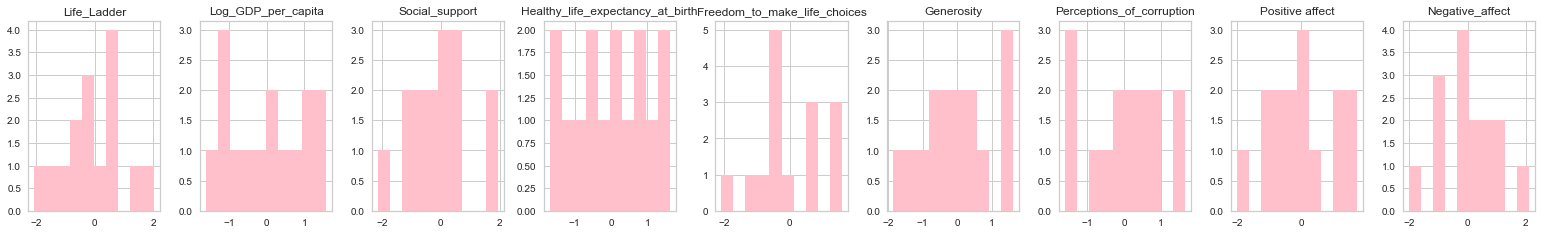

In [18]:
X2[colss].hist(layout=(1,len(colss)),figsize=(3*len(colss),3.5),color='pink')

In [19]:
def sil_score(X2,from_k=2,to_k=6):
    sils=[]
    for k in range(from_k,to_k+1):
        m=KMeans(n_clusters=k)
        m.fit(X2)
        silhouette_avg=silhouette_score(X2,m.labels_).round(4)
        sils.append([silhouette_avg,k])
        
    return sils

In [20]:
ss=sil_score(X2,2,5)
print(f'score={ss}')

score=[[0.2789, 2], [0.2715, 3], [0.2562, 4], [0.201, 5]]


In [21]:
def silhouette_plot(X2, from_k,to_k):
    sil_scores=[]
    for k in range (from_k,to_k+1):
        m=KMeans(n_clusters=k)
        visualizer=SilhouetteVisualizer(m)
        visualizer.fit(X2)
        visualizer.poof()
        sil_scores.append([visualizer.silhouette_score_,k])
    return sil_scores

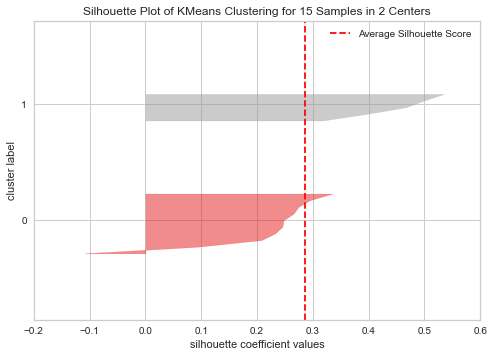

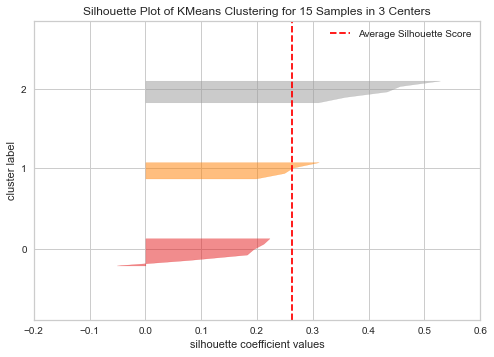

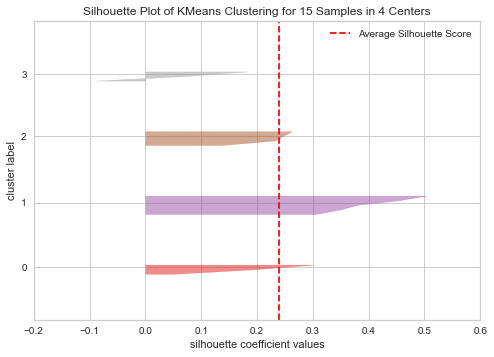

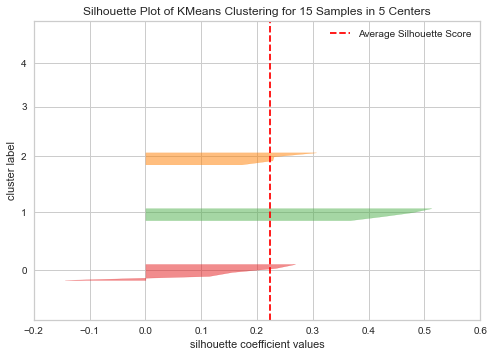

In [22]:
scores=silhouette_plot(X2,2,5)

In [23]:
print(scores)

[[0.28680753772611217, 2], [0.2626182445426764, 3], [0.23880131490150486, 4], [0.2229448672469387, 5]]


In [24]:
from yellowbrick.cluster import SilhouetteVisualizer

In [25]:
cols1=['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption', 'Positive affect',
       'Negative_affect',]

In [26]:
scaler=preprocessing.PowerTransformer(standardize=True)
S=scaler.fit_transform(df1[cols1])
S[:7].round(4)

array([[-0.4889, -1.6087,  0.1168, -1.6883, -0.5233, -0.4544,  1.6665,
        -0.8834, -0.2844],
       [-0.8354, -1.2212, -0.1209, -1.4397, -0.3406,  0.1595, -0.7584,
        -0.3197,  0.1391],
       [-1.3873, -1.1228, -2.1343, -1.1767, -0.4027,  0.4946,  1.5494,
        -0.7048, -0.8876],
       [-2.0641, -1.2221,  0.0711, -0.8987, -0.3924,  1.3824, -0.4503,
         1.1771, -0.2285],
       [ 0.4802, -0.6545,  0.259 , -0.6048, -0.613 ,  1.4748,  0.3089,
         1.2404,  0.1761],
       [ 1.4803, -0.624 , -0.295 , -0.4058,  1.5715,  0.2503,  0.7546,
         1.7483, -2.0269],
       [ 0.6909, -0.0583,  0.6319, -0.1996, -0.9135,  0.0487, -0.1855,
         0.281 , -1.1599]])

In [27]:
X11=pd.DataFrame(X2,columns=cols1)
X11.head()

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,Negative_affect
0,-0.488881,-1.608657,0.116805,-1.688276,-0.523344,-0.454364,1.666541,-0.883384,-0.284443
1,-0.835404,-1.221190,-0.120868,-1.439679,-0.340634,0.159480,-0.758425,-0.319707,0.139063
2,-1.387326,-1.122848,-2.134271,-1.176749,-0.402740,0.494579,1.549395,-0.704841,-0.887579
3,-2.064066,-1.222137,0.071096,-0.898727,-0.392402,1.382370,-0.450306,1.177055,-0.228491
4,0.480227,-0.654489,0.259009,-0.604846,-0.612978,1.474844,0.308889,1.240404,0.176107


In [28]:
model=KMeans(n_clusters=2)

In [29]:
scaler=preprocessing.PowerTransformer(standardize=True)

S=scaler.fit_transform(df1[cols1])
S[:7].round(3)

array([[-0.489, -1.609,  0.117, -1.688, -0.523, -0.454,  1.667, -0.883,
        -0.284],
       [-0.835, -1.221, -0.121, -1.44 , -0.341,  0.159, -0.758, -0.32 ,
         0.139],
       [-1.387, -1.123, -2.134, -1.177, -0.403,  0.495,  1.549, -0.705,
        -0.888],
       [-2.064, -1.222,  0.071, -0.899, -0.392,  1.382, -0.45 ,  1.177,
        -0.228],
       [ 0.48 , -0.654,  0.259, -0.605, -0.613,  1.475,  0.309,  1.24 ,
         0.176],
       [ 1.48 , -0.624, -0.295, -0.406,  1.572,  0.25 ,  0.755,  1.748,
        -2.027],
       [ 0.691, -0.058,  0.632, -0.2  , -0.914,  0.049, -0.186,  0.281,
        -1.16 ]])

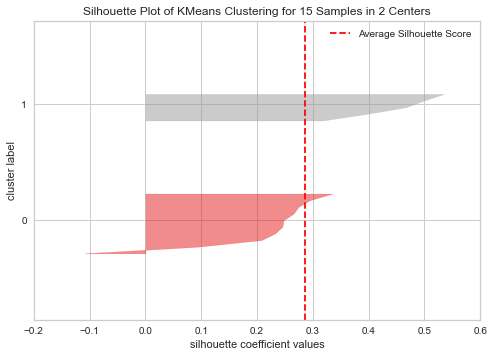

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 15 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
visualizer=SilhouetteVisualizer(model)
visualizer.fit(X11)
visualizer.poof()

In [31]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]


In [32]:
dx=X11
dx['cluster']=model.labels_
dx.sample(5)

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,Negative_affect,cluster
3,-2.064066,-1.222137,0.071096,-0.898727,-0.392402,1.382370,-0.450306,1.177055,-0.228491,0
13,-0.061003,1.580178,0.495431,1.369660,0.503768,-0.701082,-1.612628,-0.014650,0.748137,1
2,-1.387326,-1.122848,-2.134271,-1.176749,-0.402740,0.494579,1.549395,-0.704841,-0.887579,0
7,0.517225,0.136177,1.598509,0.014033,-2.069494,0.780790,0.918505,0.066608,-1.037461,0
8,2.038188,0.185013,1.945971,0.235385,0.557590,1.610661,0.518563,-0.954522,-0.154602,0


In [33]:
df1=X11
df1['cluster']=model.labels_
df1

,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,Negative_affect,cluster
0,-0.488881,-1.608657,0.116805,-1.688276,-0.523344,-0.454364,1.666541,-0.883384,-0.284443,0
1,-0.835404,-1.221190,-0.120868,-1.439679,-0.340634,0.159480,-0.758425,-0.319707,0.139063,0
2,-1.387326,-1.122848,-2.134271,-1.176749,-0.402740,0.494579,1.549395,-0.704841,-0.887579,0
3,-2.064066,-1.222137,0.071096,-0.898727,-0.392402,1.382370,-0.450306,1.177055,-0.228491,0
4,0.480227,-0.654489,0.259009,-0.604846,-0.612978,1.474844,0.308889,1.240404,0.176107,0
5,1.480286,-0.624047,-0.294976,-0.405846,1.571502,0.250335,0.754607,1.748306,-2.026930,0
6,0.690936,-0.058254,0.631883,-0.199632,-0.913509,0.048706,-0.185524,0.281048,-1.159933,0
7,0.517225,0.136177,1.598509,0.014033,-2.069494,0.780790,0.918505,0.066608,-1.037461,0
8,2.038188,0.185013,1.945971,0.235385,0.557590,1.610661,0.518563,-0.954522,-0.154602,0
9,0.441237,0.425581,-0.985112,0.464689,0.080434,-0.622652,0.115385,1.394310,-0.011402,0


**Evalution**

In [34]:
visualizer.silhouette_score_

0.28680753772611217

In [35]:
print('Score -> {:.2f}'.format(visualizer.silhouette_score_))

Score -> 0.29


**Deployment**